In [131]:
from utils import SQLutils
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib
import matplotlib.pyplot as plt

sql_engine = SQLutils.MysqlEngine(host='localhost',port='3306',user='wieneralan',password='0922',database='stock_data')
df = SQLutils.Mysql2DF(sql_conn=sql_engine, symbol='601901',table_name='hs300_feat',sel_column='*',start_date='2010-01-01', end_date='2023-11-27') # 取出特征
df_price = SQLutils.Mysql2DF(sql_conn=sql_engine, symbol='601901',table_name='hs300_daily_price',sel_column='close_price',start_date='2010-01-01', end_date='2023-11-27') # 从数据库取出收盘价
# 收盘价相对昨天上涨=1， 下降=-1
y_data = df_price['close_price'].shift(-1)-df_price['close_price']
y_data[y_data>=0]=1
y_data[y_data<0]=-1
df['y_data'] = y_data
# print(df)
# 去除包含None或NaN的行
df_clean = df.dropna()
# print('hs300 shape ',df_clean.shape)
# 划分训练集、测试集
train_size = int(df_clean.shape[0]*0.8)
train_data, test_data = df_clean[:train_size], df_clean[train_size:]
# # 得到训练集和测试集数据
X_train = train_data.loc[:, ~df_clean.columns.isin(['id','symbol','price_date','y_data'])].copy() # 剔除非特征的列
X_test = test_data.loc[:, ~df_clean.columns.isin(['id','symbol','price_date','y_data'])].copy() # 剔除非特征的列
y_train = train_data['y_data'].copy()
y_test = test_data['y_data'].copy()
#标准化数据
scaler = preprocessing.StandardScaler().fit(X_train)
joblib.dump(scaler,'scaler.pkl')
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

## 训练model
tuned_parameters = [
    {'n_estimators':[500,1000], 'min_samples_split':[5], 'min_samples_leaf':[1]}
]
model = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10)
# model = RandomForestClassifier(min_samples_split=5, n_estimators=500)
model.fit(X_train_norm,y_train)
print("best model:")
# print(model.best_estimator_)

y_pred = model.predict(X_test_norm)


best model:


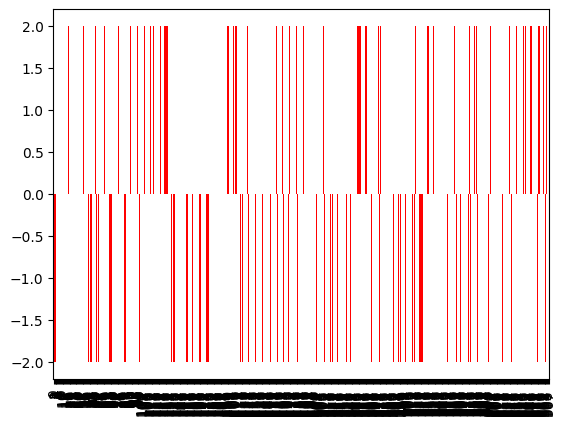

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
y_pred = pd.Series(y_pred)
# y_test.plot(kind='bar')
# y_pred.plot(color='r',kind='bar')
y_dis = pd.Series(y_test.values-y_pred.values)
y_dis.plot(color='r',kind='bar')
plt.show()

In [133]:
print(type(y_pred),type(y_test))
print(y_pred,y_test)
y_dis[y_dis!=0]=1
print(y_dis.sum())
print(len(y_dis),1-y_dis.sum()/len(y_dis))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
563    1.0
564   -1.0
565   -1.0
566   -1.0
567    1.0
Length: 568, dtype: float64 2300   -1.0
2301   -1.0
2302   -1.0
2303    1.0
2304   -1.0
       ... 
2863   -1.0
2864    1.0
2865   -1.0
2866   -1.0
2867   -1.0
Name: y_data, Length: 568, dtype: float64
275.0
568 0.5158450704225352


<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
0     -1.0
1     -1.0
2      1.0
3      1.0
4     -1.0
      ... 
660    1.0
661    1.0
662    1.0
663   -1.0
664    1.0
Length: 665, dtype: float64 2657   -1.0
2658   -1.0
2659    1.0
2660   -1.0
2661   -1.0
       ... 
3317    1.0
3318   -1.0
3319    1.0
3320   -1.0
3321   -1.0
Name: y_data, Length: 665, dtype: float64
345.0
665 0.48120300751879697


<Axes: >

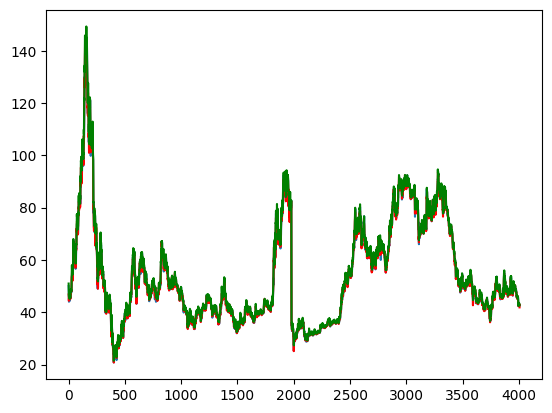

In [11]:
df['open_price'].plot()
df['close_price'].plot(color='r')
df['high_price'].plot(color='g')
print(X_test['close_price'],X_test['close_price'].shift(-1))
for scores in model.cv_results_:
    print(scores)

In [3]:
print(iter_feat['open_price_daily_return'])

1077336         NaN
1077337   -0.168421
1077338   -0.022911
1077339    0.014380
1077340   -0.006386
             ...   
1078149    0.007654
1078150   -0.010374
1078151   -0.017222
1078152    0.013333
1078153    0.016729
Name: open_price_daily_return, Length: 818, dtype: float64
